In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# Model selection for long term forecasts

In [2]:
df = pd.read_excel("BaseFeaturesHH.xlsx")
df = df.drop('Unnamed: 0', axis = 1)
df

,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,2018-01-01 00:00:00,12.80,0,0.0,1,1,6.4,1.9,82.76
1,2018-01-01 00:30:00,12.30,0,0.5,1,1,6.4,1.9,82.76
2,2018-01-01 01:00:00,13.50,0,1.0,1,1,6.6,2.4,80.14
3,2018-01-01 01:30:00,11.90,0,1.5,1,1,6.6,2.4,80.14
4,2018-01-01 02:00:00,12.80,0,2.0,1,1,6.1,2.0,84.33
...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,21.5,0,12,6.5,3.3,88.23
35036,2019-12-31 22:00:00,13.81,1,22.0,0,12,6.6,4.4,87.69
35037,2019-12-31 22:30:00,14.12,1,22.5,0,12,6.6,4.4,87.69
35038,2019-12-31 23:00:00,14.50,1,23.0,0,12,6.7,4.1,88.13


# First by splitting it according to time
The splitting will be 60:20:20


In [3]:
feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   
    
X = df[feature_cols].copy() #input features for fitting

size = -int(len(df)*0.2)

Xinput = df.iloc[:size]
Xtest = df.iloc[size:] # 20%

size2 = -int(len(Xinput)*0.25)

Xtrain = Xinput.iloc[:size2].copy() #60%
Xvalidate = Xinput.iloc[size2:].copy() #20%

trainX = Xtrain[feature_cols] # Features
trainy = Xtrain['HH Electricity (kWh)'] # Target variable

validateX = Xvalidate[feature_cols] # Features
validatey = Xvalidate['HH Electricity (kWh)'] # Target variable

testX = Xtest[feature_cols] # Features
testy = Xtest['HH Electricity (kWh)'] # Target variable

inputX = Xinput[feature_cols] # Features
inputy = Xinput['HH Electricity (kWh)'] # Target variable

scaler = StandardScaler() #scaling
scaler.fit(X)
trainXscaled = scaler.transform(trainX)
validateXscaled = scaler.transform(validateX)
testXscaled = scaler.transform(testX)
inputXscaled = scaler.transform(inputX)

In [4]:
print(len(trainXscaled))
print(len(validateXscaled))
print(len(testXscaled))
print(len(inputXscaled))

21024
7008
7008
28032


# Random Forest Regressor

In [5]:
N = range(10,1011,100)

RFR = GridSearchCV(RandomForestRegressor(random_state=42), {
    'n_estimators': N
}, cv=5, return_train_score=False)
RFR.fit(inputXscaled, inputy)

RFR_results = pd.DataFrame(RFR.cv_results_)
RFR_results = RFR_results[['param_n_estimators', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
RFR_results

,param_n_estimators,mean_test_score,rank_test_score
9,910,0.747263,1
10,1010,0.747204,2
8,810,0.746999,3
7,710,0.746916,4
4,410,0.746739,5
6,610,0.746677,6
2,210,0.746643,7
5,510,0.746616,8
3,310,0.746490,9
1,110,0.746414,10


In [6]:
N = range(5,96,10)

RFR1 = GridSearchCV(RandomForestRegressor(random_state=42), {
    'n_estimators': N
}, cv=5, return_train_score=False)
RFR1.fit(inputXscaled, inputy)

RFRresults1 = pd.DataFrame(RFR1.cv_results_)
RFRresults1 = RFRresults1[['param_n_estimators', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
RFRresults1



,param_n_estimators,mean_test_score,rank_test_score
6,65,0.748146,1
4,45,0.747806,2
7,75,0.747256,3
5,55,0.747252,4
3,35,0.747173,5
8,85,0.746661,6
9,95,0.746464,7
2,25,0.745368,8
1,15,0.744560,9
0,5,0.734550,10


In [7]:
RFRresults2 = RFR_results.copy()
RFRresults = RFRresults2.append(RFRresults1)
RFRresults = RFRresults.sort_values(by=['mean_test_score'])
RFRresults


,param_n_estimators,mean_test_score,rank_test_score
0,5,0.734550,10
1,15,0.744560,9
0,10,0.744749,11
2,25,0.745368,8
1,110,0.746414,10
9,95,0.746464,7
3,310,0.746490,9
5,510,0.746616,8
2,210,0.746643,7
8,85,0.746661,6


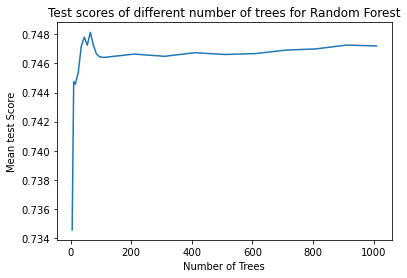

In [8]:
RFRresults = RFRresults.sort_values(by=['param_n_estimators'])
plt.plot(RFRresults['param_n_estimators'], RFRresults['mean_test_score'])

plt.xlabel('Number of Trees')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores of different number of trees for Random Forest')
# Display a figure.
plt.show()

In [ ]:
estimator = RandomForestRegressor(n_estimators = 3000,  random_state=42).fit(inputXscaled, inputy)
y_pred = estimator.predict(testXscaled)

RandomForestMAPE = mean_absolute_percentage_error(testy, y_pred) * 100
print(RandomForestMAPE)

from matplotlib.figure import Figure as figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(testy,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

16.017717728222316


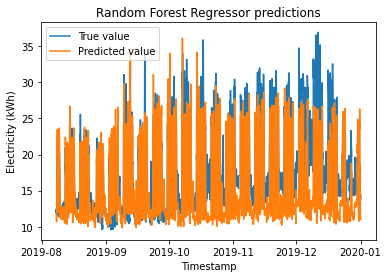

In [10]:
pred = estimator.predict(testXscaled)

RandomForestMAPE = mean_absolute_percentage_error(testy, pred) * 100
print(RandomForestMAPE)

plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
# show a legend on the plot
plt.xlabel('Timestamp')
plt.ylabel('Electricity (kWh)')
plt.legend()

# Visualization examples

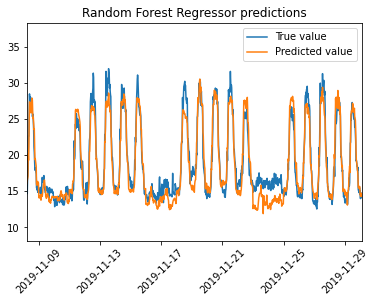

In [19]:
short

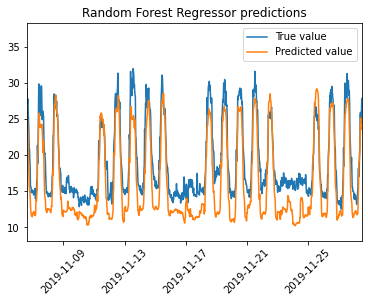

In [11]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.xlim(df['From Timestamp'].iloc[size+4350], df['From Timestamp'].iloc[size+5400])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

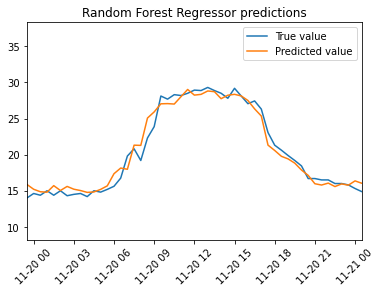

In [30]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.xlim(df['From Timestamp'].iloc[size+4914], df['From Timestamp'].iloc[size+4964])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

Looks decent but on other parts:

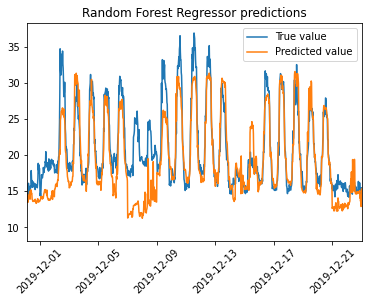

In [15]:
short

This should be the worst part

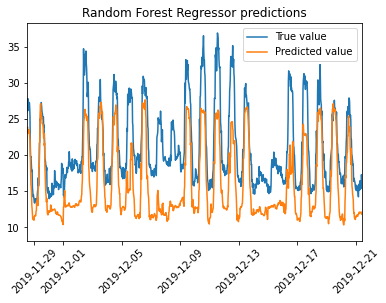

In [12]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.xlim(df['From Timestamp'].iloc[size+5400], df['From Timestamp'].iloc[size+6500])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

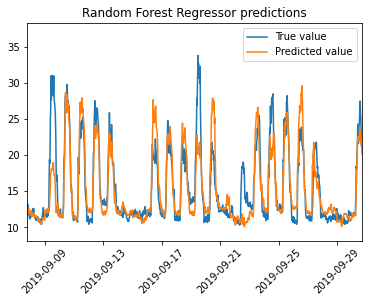

In [158]:
short

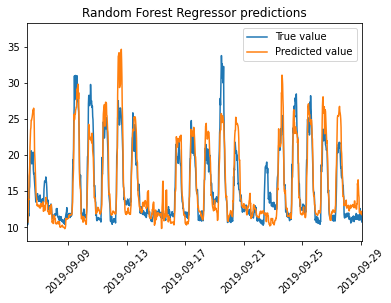

In [13]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.xlim(df['From Timestamp'].iloc[size+1400], df['From Timestamp'].iloc[size+2500])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

what is that random spike during the weekend between the 2nd and 3rd week

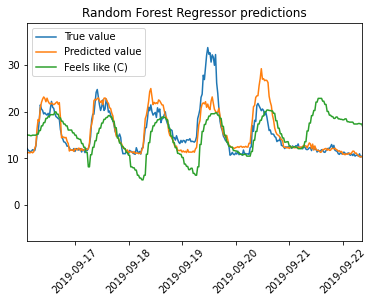

In [37]:
short

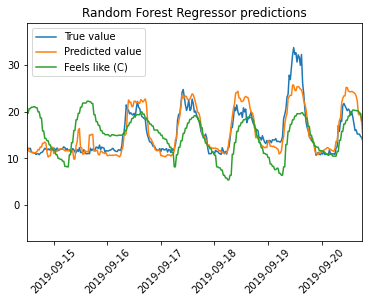

In [14]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.plot(df['From Timestamp'].iloc[size:],df['Feels like (C)'].iloc[size:], label = "Feels like (C)")
plt.xlim(df['From Timestamp'].iloc[size+1800], df['From Timestamp'].iloc[size+2100])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

### Unless we consider "International Talk like a Pirate Day" to be a special day there is no information/data that would justify the unusual behaviour on that day

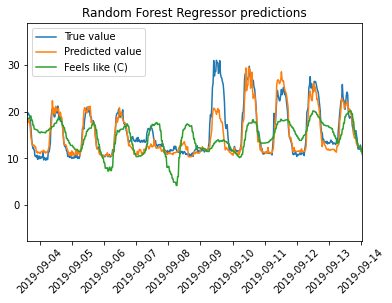

In [40]:
short

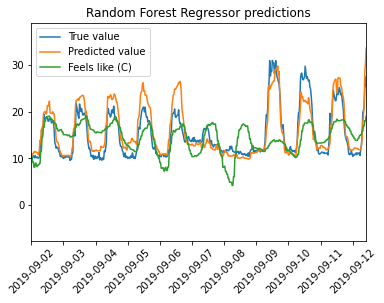

In [15]:
plt.title('Random Forest Regressor predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
plt.plot(df['From Timestamp'].iloc[size:],df['Feels like (C)'].iloc[size:], label = "Feels like (C)")
plt.xlim(df['From Timestamp'].iloc[size+1200], df['From Timestamp'].iloc[size+1700])
plt.xticks(rotation=45)
# show a legend on the plot
plt.legend()

# KNN


In [17]:
N = range(1,150,1)

KNN = GridSearchCV(KNeighborsRegressor(), {
    'n_neighbors': N,
    'weights': ['uniform', 'distance']
}, cv=5, return_train_score=False, verbose = 3)
KNN.fit(inputXscaled, inputy)
KNN_results = pd.DataFrame(KNN.cv_results_)
KNN_results = KNN_results[['param_n_neighbors', 'param_weights', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
KNN_results

Fitting 5 folds for each of 298 candidates, totalling 1490 fits
[CV 1/5] END .................n_neighbors=1, weights=uniform; total time=   0.5s
[CV 2/5] END .................n_neighbors=1, weights=uniform; total time=   0.6s
[CV 3/5] END .................n_neighbors=1, weights=uniform; total time=   0.7s
[CV 4/5] END .................n_neighbors=1, weights=uniform; total time=   0.4s
[CV 5/5] END .................n_neighbors=1, weights=uniform; total time=   0.5s
[CV 1/5] END ................n_neighbors=1, weights=distance; total time=   0.4s
[CV 2/5] END ................n_neighbors=1, weights=distance; total time=   0.5s
[CV 3/5] END ................n_neighbors=1, weights=distance; total time=   0.5s
[CV 4/5] END ................n_neighbors=1, weights=distance; total time=   0.4s
[CV 5/5] END ................n_neighbors=1, weights=distance; total time=   0.5s
[CV 1/5] END .................n_neighbors=2, weights=uniform; total time=   0.6s
[CV 2/5] END .................n_neighbors=2, 

[CV 2/5] END ................n_neighbors=11, weights=uniform; total time=   0.6s
[CV 3/5] END ................n_neighbors=11, weights=uniform; total time=   0.7s
[CV 4/5] END ................n_neighbors=11, weights=uniform; total time=   0.5s
[CV 5/5] END ................n_neighbors=11, weights=uniform; total time=   0.5s
[CV 1/5] END ...............n_neighbors=11, weights=distance; total time=   0.5s
[CV 2/5] END ...............n_neighbors=11, weights=distance; total time=   0.6s
[CV 3/5] END ...............n_neighbors=11, weights=distance; total time=   0.6s
[CV 4/5] END ...............n_neighbors=11, weights=distance; total time=   0.5s
[CV 5/5] END ...............n_neighbors=11, weights=distance; total time=   0.5s
[CV 1/5] END ................n_neighbors=12, weights=uniform; total time=   0.5s
[CV 2/5] END ................n_neighbors=12, weights=uniform; total time=   0.6s
[CV 3/5] END ................n_neighbors=12, weights=uniform; total time=   0.7s
[CV 4/5] END ...............

[CV 4/5] END ................n_neighbors=21, weights=uniform; total time=   0.7s
[CV 5/5] END ................n_neighbors=21, weights=uniform; total time=   0.6s
[CV 1/5] END ...............n_neighbors=21, weights=distance; total time=   0.7s
[CV 2/5] END ...............n_neighbors=21, weights=distance; total time=   0.7s
[CV 3/5] END ...............n_neighbors=21, weights=distance; total time=   0.6s
[CV 4/5] END ...............n_neighbors=21, weights=distance; total time=   0.5s
[CV 5/5] END ...............n_neighbors=21, weights=distance; total time=   0.5s
[CV 1/5] END ................n_neighbors=22, weights=uniform; total time=   0.5s
[CV 2/5] END ................n_neighbors=22, weights=uniform; total time=   0.6s
[CV 3/5] END ................n_neighbors=22, weights=uniform; total time=   0.6s
[CV 4/5] END ................n_neighbors=22, weights=uniform; total time=   0.5s
[CV 5/5] END ................n_neighbors=22, weights=uniform; total time=   0.5s
[CV 1/5] END ...............

[CV 1/5] END ...............n_neighbors=31, weights=distance; total time=   0.6s
[CV 2/5] END ...............n_neighbors=31, weights=distance; total time=   0.7s
[CV 3/5] END ...............n_neighbors=31, weights=distance; total time=   0.7s
[CV 4/5] END ...............n_neighbors=31, weights=distance; total time=   0.6s
[CV 5/5] END ...............n_neighbors=31, weights=distance; total time=   0.5s
[CV 1/5] END ................n_neighbors=32, weights=uniform; total time=   0.6s
[CV 2/5] END ................n_neighbors=32, weights=uniform; total time=   0.7s
[CV 3/5] END ................n_neighbors=32, weights=uniform; total time=   0.8s
[CV 4/5] END ................n_neighbors=32, weights=uniform; total time=   0.7s
[CV 5/5] END ................n_neighbors=32, weights=uniform; total time=   0.6s
[CV 1/5] END ...............n_neighbors=32, weights=distance; total time=   0.6s
[CV 2/5] END ...............n_neighbors=32, weights=distance; total time=   0.7s
[CV 3/5] END ...............

[CV 3/5] END ...............n_neighbors=41, weights=distance; total time=   0.7s
[CV 4/5] END ...............n_neighbors=41, weights=distance; total time=   0.6s
[CV 5/5] END ...............n_neighbors=41, weights=distance; total time=   0.6s
[CV 1/5] END ................n_neighbors=42, weights=uniform; total time=   0.6s
[CV 2/5] END ................n_neighbors=42, weights=uniform; total time=   0.8s
[CV 3/5] END ................n_neighbors=42, weights=uniform; total time=   0.7s
[CV 4/5] END ................n_neighbors=42, weights=uniform; total time=   0.6s
[CV 5/5] END ................n_neighbors=42, weights=uniform; total time=   0.6s
[CV 1/5] END ...............n_neighbors=42, weights=distance; total time=   0.6s
[CV 2/5] END ...............n_neighbors=42, weights=distance; total time=   0.7s
[CV 3/5] END ...............n_neighbors=42, weights=distance; total time=   0.7s
[CV 4/5] END ...............n_neighbors=42, weights=distance; total time=   0.6s
[CV 5/5] END ...............

[CV 5/5] END ...............n_neighbors=51, weights=distance; total time=   0.6s
[CV 1/5] END ................n_neighbors=52, weights=uniform; total time=   0.7s
[CV 2/5] END ................n_neighbors=52, weights=uniform; total time=   0.7s
[CV 3/5] END ................n_neighbors=52, weights=uniform; total time=   0.8s
[CV 4/5] END ................n_neighbors=52, weights=uniform; total time=   0.6s
[CV 5/5] END ................n_neighbors=52, weights=uniform; total time=   0.6s
[CV 1/5] END ...............n_neighbors=52, weights=distance; total time=   0.7s
[CV 2/5] END ...............n_neighbors=52, weights=distance; total time=   0.8s
[CV 3/5] END ...............n_neighbors=52, weights=distance; total time=   0.8s
[CV 4/5] END ...............n_neighbors=52, weights=distance; total time=   0.6s
[CV 5/5] END ...............n_neighbors=52, weights=distance; total time=   0.6s
[CV 1/5] END ................n_neighbors=53, weights=uniform; total time=   0.6s
[CV 2/5] END ...............

[CV 2/5] END ................n_neighbors=62, weights=uniform; total time=   0.8s
[CV 3/5] END ................n_neighbors=62, weights=uniform; total time=   0.8s
[CV 4/5] END ................n_neighbors=62, weights=uniform; total time=   0.6s
[CV 5/5] END ................n_neighbors=62, weights=uniform; total time=   0.7s
[CV 1/5] END ...............n_neighbors=62, weights=distance; total time=   0.7s
[CV 2/5] END ...............n_neighbors=62, weights=distance; total time=   0.8s
[CV 3/5] END ...............n_neighbors=62, weights=distance; total time=   0.8s
[CV 4/5] END ...............n_neighbors=62, weights=distance; total time=   0.7s
[CV 5/5] END ...............n_neighbors=62, weights=distance; total time=   0.7s
[CV 1/5] END ................n_neighbors=63, weights=uniform; total time=   0.9s
[CV 2/5] END ................n_neighbors=63, weights=uniform; total time=   1.0s
[CV 3/5] END ................n_neighbors=63, weights=uniform; total time=   0.8s
[CV 4/5] END ...............

[CV 4/5] END ................n_neighbors=72, weights=uniform; total time=   0.7s
[CV 5/5] END ................n_neighbors=72, weights=uniform; total time=   0.7s
[CV 1/5] END ...............n_neighbors=72, weights=distance; total time=   0.7s
[CV 2/5] END ...............n_neighbors=72, weights=distance; total time=   0.8s
[CV 3/5] END ...............n_neighbors=72, weights=distance; total time=   0.8s
[CV 4/5] END ...............n_neighbors=72, weights=distance; total time=   0.7s
[CV 5/5] END ...............n_neighbors=72, weights=distance; total time=   0.7s
[CV 1/5] END ................n_neighbors=73, weights=uniform; total time=   0.7s
[CV 2/5] END ................n_neighbors=73, weights=uniform; total time=   0.8s
[CV 3/5] END ................n_neighbors=73, weights=uniform; total time=   0.9s
[CV 4/5] END ................n_neighbors=73, weights=uniform; total time=   0.7s
[CV 5/5] END ................n_neighbors=73, weights=uniform; total time=   0.7s
[CV 1/5] END ...............

[CV 1/5] END ...............n_neighbors=82, weights=distance; total time=   0.8s
[CV 2/5] END ...............n_neighbors=82, weights=distance; total time=   0.9s
[CV 3/5] END ...............n_neighbors=82, weights=distance; total time=   1.0s
[CV 4/5] END ...............n_neighbors=82, weights=distance; total time=   0.7s
[CV 5/5] END ...............n_neighbors=82, weights=distance; total time=   0.8s
[CV 1/5] END ................n_neighbors=83, weights=uniform; total time=   0.8s
[CV 2/5] END ................n_neighbors=83, weights=uniform; total time=   0.9s
[CV 3/5] END ................n_neighbors=83, weights=uniform; total time=   0.9s
[CV 4/5] END ................n_neighbors=83, weights=uniform; total time=   0.8s
[CV 5/5] END ................n_neighbors=83, weights=uniform; total time=   0.9s
[CV 1/5] END ...............n_neighbors=83, weights=distance; total time=   0.8s
[CV 2/5] END ...............n_neighbors=83, weights=distance; total time=   1.2s
[CV 3/5] END ...............

[CV 3/5] END ...............n_neighbors=92, weights=distance; total time=   0.9s
[CV 4/5] END ...............n_neighbors=92, weights=distance; total time=   0.7s
[CV 5/5] END ...............n_neighbors=92, weights=distance; total time=   0.7s
[CV 1/5] END ................n_neighbors=93, weights=uniform; total time=   0.8s
[CV 2/5] END ................n_neighbors=93, weights=uniform; total time=   0.9s
[CV 3/5] END ................n_neighbors=93, weights=uniform; total time=   1.0s
[CV 4/5] END ................n_neighbors=93, weights=uniform; total time=   0.7s
[CV 5/5] END ................n_neighbors=93, weights=uniform; total time=   0.8s
[CV 1/5] END ...............n_neighbors=93, weights=distance; total time=   0.8s
[CV 2/5] END ...............n_neighbors=93, weights=distance; total time=   0.9s
[CV 3/5] END ...............n_neighbors=93, weights=distance; total time=   0.9s
[CV 4/5] END ...............n_neighbors=93, weights=distance; total time=   0.7s
[CV 5/5] END ...............

[CV 5/5] END ..............n_neighbors=102, weights=distance; total time=   0.8s
[CV 1/5] END ...............n_neighbors=103, weights=uniform; total time=   0.8s
[CV 2/5] END ...............n_neighbors=103, weights=uniform; total time=   1.0s
[CV 3/5] END ...............n_neighbors=103, weights=uniform; total time=   1.0s
[CV 4/5] END ...............n_neighbors=103, weights=uniform; total time=   0.8s
[CV 5/5] END ...............n_neighbors=103, weights=uniform; total time=   0.8s
[CV 1/5] END ..............n_neighbors=103, weights=distance; total time=   0.8s
[CV 2/5] END ..............n_neighbors=103, weights=distance; total time=   1.0s
[CV 3/5] END ..............n_neighbors=103, weights=distance; total time=   1.0s
[CV 4/5] END ..............n_neighbors=103, weights=distance; total time=   0.8s
[CV 5/5] END ..............n_neighbors=103, weights=distance; total time=   0.8s
[CV 1/5] END ...............n_neighbors=104, weights=uniform; total time=   0.8s
[CV 2/5] END ...............

[CV 2/5] END ...............n_neighbors=113, weights=uniform; total time=   1.0s
[CV 3/5] END ...............n_neighbors=113, weights=uniform; total time=   1.0s
[CV 4/5] END ...............n_neighbors=113, weights=uniform; total time=   0.8s
[CV 5/5] END ...............n_neighbors=113, weights=uniform; total time=   0.8s
[CV 1/5] END ..............n_neighbors=113, weights=distance; total time=   0.9s
[CV 2/5] END ..............n_neighbors=113, weights=distance; total time=   1.2s
[CV 3/5] END ..............n_neighbors=113, weights=distance; total time=   1.0s
[CV 4/5] END ..............n_neighbors=113, weights=distance; total time=   0.8s
[CV 5/5] END ..............n_neighbors=113, weights=distance; total time=   0.8s
[CV 1/5] END ...............n_neighbors=114, weights=uniform; total time=   0.9s
[CV 2/5] END ...............n_neighbors=114, weights=uniform; total time=   1.0s
[CV 3/5] END ...............n_neighbors=114, weights=uniform; total time=   1.0s
[CV 4/5] END ...............

[CV 4/5] END ...............n_neighbors=123, weights=uniform; total time=   0.8s
[CV 5/5] END ...............n_neighbors=123, weights=uniform; total time=   0.8s
[CV 1/5] END ..............n_neighbors=123, weights=distance; total time=   0.9s
[CV 2/5] END ..............n_neighbors=123, weights=distance; total time=   1.0s
[CV 3/5] END ..............n_neighbors=123, weights=distance; total time=   1.0s
[CV 4/5] END ..............n_neighbors=123, weights=distance; total time=   0.8s
[CV 5/5] END ..............n_neighbors=123, weights=distance; total time=   0.8s
[CV 1/5] END ...............n_neighbors=124, weights=uniform; total time=   0.9s
[CV 2/5] END ...............n_neighbors=124, weights=uniform; total time=   1.0s
[CV 3/5] END ...............n_neighbors=124, weights=uniform; total time=   1.0s
[CV 4/5] END ...............n_neighbors=124, weights=uniform; total time=   0.8s
[CV 5/5] END ...............n_neighbors=124, weights=uniform; total time=   0.8s
[CV 1/5] END ..............n

[CV 1/5] END ..............n_neighbors=133, weights=distance; total time=   0.9s
[CV 2/5] END ..............n_neighbors=133, weights=distance; total time=   1.0s
[CV 3/5] END ..............n_neighbors=133, weights=distance; total time=   1.1s
[CV 4/5] END ..............n_neighbors=133, weights=distance; total time=   0.8s
[CV 5/5] END ..............n_neighbors=133, weights=distance; total time=   0.8s
[CV 1/5] END ...............n_neighbors=134, weights=uniform; total time=   0.9s
[CV 2/5] END ...............n_neighbors=134, weights=uniform; total time=   1.0s
[CV 3/5] END ...............n_neighbors=134, weights=uniform; total time=   1.1s
[CV 4/5] END ...............n_neighbors=134, weights=uniform; total time=   0.8s
[CV 5/5] END ...............n_neighbors=134, weights=uniform; total time=   0.9s
[CV 1/5] END ..............n_neighbors=134, weights=distance; total time=   0.9s
[CV 2/5] END ..............n_neighbors=134, weights=distance; total time=   1.0s
[CV 3/5] END ..............n

[CV 3/5] END ..............n_neighbors=143, weights=distance; total time=   1.2s
[CV 4/5] END ..............n_neighbors=143, weights=distance; total time=   0.9s
[CV 5/5] END ..............n_neighbors=143, weights=distance; total time=   0.9s
[CV 1/5] END ...............n_neighbors=144, weights=uniform; total time=   0.9s
[CV 2/5] END ...............n_neighbors=144, weights=uniform; total time=   1.1s
[CV 3/5] END ...............n_neighbors=144, weights=uniform; total time=   1.1s
[CV 4/5] END ...............n_neighbors=144, weights=uniform; total time=   0.9s
[CV 5/5] END ...............n_neighbors=144, weights=uniform; total time=   0.9s
[CV 1/5] END ..............n_neighbors=144, weights=distance; total time=   0.9s
[CV 2/5] END ..............n_neighbors=144, weights=distance; total time=   1.1s
[CV 3/5] END ..............n_neighbors=144, weights=distance; total time=   1.1s
[CV 4/5] END ..............n_neighbors=144, weights=distance; total time=   0.9s
[CV 5/5] END ..............n

,param_n_neighbors,param_weights,mean_test_score,rank_test_score
75,38,distance,0.687550,1
73,37,distance,0.687497,2
71,36,distance,0.687463,3
81,41,distance,0.687440,4
77,39,distance,0.687402,5
...,...,...,...,...
5,3,distance,0.619515,294
3,2,distance,0.589475,295
2,2,uniform,0.588758,296
1,1,distance,0.572986,297


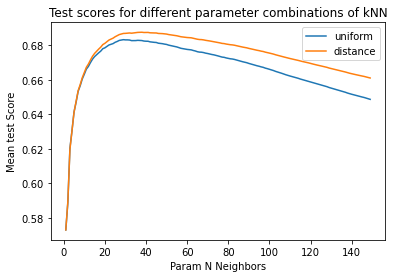

In [18]:
KNNuniform = KNN_results[(KNN_results['param_weights'] == 'uniform' )].sort_values(by = ['param_n_neighbors'])
KNNdistance = KNN_results[(KNN_results['param_weights'] == 'distance' )].sort_values(by = ['param_n_neighbors'])

plt.plot(KNNuniform['param_n_neighbors'], KNNuniform['mean_test_score'], label = 'uniform')
plt.plot(KNNdistance['param_n_neighbors'], KNNdistance['mean_test_score'], label = 'distance')

plt.xlabel('Param N Neighbors')
# Set the y axis label of the current axis.
plt.ylabel('Mean test Score')
# Set a title of the current axes.
plt.title('Test scores for different parameter combinations of kNN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

15.716107652101543


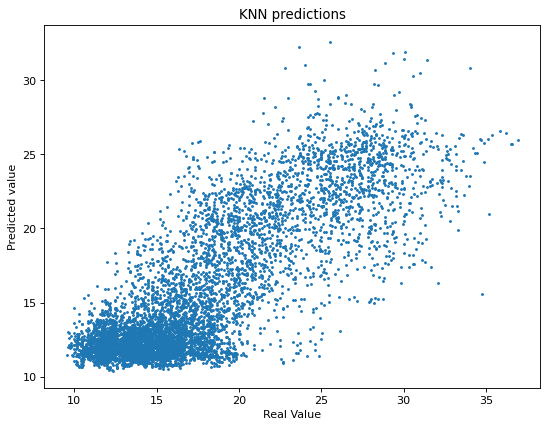

In [27]:
estimator = KNeighborsRegressor(n_neighbors = 38, weights = 'distance').fit(inputXscaled, inputy)
y_pred = estimator.predict(testXscaled)

KNNMAPE = mean_absolute_percentage_error(testy, y_pred) * 100
print(KNNMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(testy,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('KNN predictions')
# Display a figure.
plt.show()

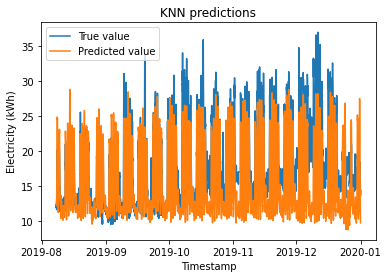

In [28]:
plt.title('KNN predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
# show a legend on the plot
plt.xlabel('Timestamp')
plt.ylabel('Electricity (kWh)')
plt.legend()


# SVM Regression

In [21]:
SVM = GridSearchCV(svm.SVR(gamma='scale'), {
    'C': [0.01, 0.1, 1, 100], 
    'kernel': ['rbf','linear'],
    'epsilon': [0.01,0.1,1,10]
}, cv=5, return_train_score=False, verbose = 4)
SVM.fit(inputXscaled, inputy)

svm_results = pd.DataFrame(SVM.cv_results_)
svmresults = svm_results[['param_kernel','param_C','param_epsilon', 'mean_test_score', 'rank_test_score']].sort_values(by=['rank_test_score'])
svmresults

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ...............C=0.01, epsilon=0.01, kernel=rbf; total time=  50.9s
[CV 2/5] END ...............C=0.01, epsilon=0.01, kernel=rbf; total time=  50.2s
[CV 3/5] END ...............C=0.01, epsilon=0.01, kernel=rbf; total time=  51.6s
[CV 4/5] END ...............C=0.01, epsilon=0.01, kernel=rbf; total time=  50.8s
[CV 5/5] END ...............C=0.01, epsilon=0.01, kernel=rbf; total time=  51.4s
[CV 1/5] END ............C=0.01, epsilon=0.01, kernel=linear; total time=  27.8s
[CV 2/5] END ............C=0.01, epsilon=0.01, kernel=linear; total time=  28.6s
[CV 3/5] END ............C=0.01, epsilon=0.01, kernel=linear; total time=  28.0s
[CV 4/5] END ............C=0.01, epsilon=0.01, kernel=linear; total time=  28.1s
[CV 5/5] END ............C=0.01, epsilon=0.01, kernel=linear; total time=  30.7s
[CV 1/5] END ................C=0.01, epsilon=0.1, kernel=rbf; total time=  52.1s
[CV 2/5] END ................C=0.01, epsilon=0.

[CV 2/5] END .....................C=1, epsilon=1, kernel=rbf; total time=  31.3s
[CV 3/5] END .....................C=1, epsilon=1, kernel=rbf; total time=  30.7s
[CV 4/5] END .....................C=1, epsilon=1, kernel=rbf; total time=  30.2s
[CV 5/5] END .....................C=1, epsilon=1, kernel=rbf; total time=  31.5s
[CV 1/5] END ..................C=1, epsilon=1, kernel=linear; total time=  25.3s
[CV 2/5] END ..................C=1, epsilon=1, kernel=linear; total time=  25.7s
[CV 3/5] END ..................C=1, epsilon=1, kernel=linear; total time=  26.1s
[CV 4/5] END ..................C=1, epsilon=1, kernel=linear; total time=  25.5s
[CV 5/5] END ..................C=1, epsilon=1, kernel=linear; total time=  26.4s
[CV 1/5] END ....................C=1, epsilon=10, kernel=rbf; total time=   0.4s
[CV 2/5] END ....................C=1, epsilon=10, kernel=rbf; total time=   0.4s
[CV 3/5] END ....................C=1, epsilon=10, kernel=rbf; total time=   0.3s
[CV 4/5] END ...............

,param_kernel,param_C,param_epsilon,mean_test_score,rank_test_score
28,rbf,100,1,0.649825,1
24,rbf,100,0.01,0.625012,2
26,rbf,100,0.1,0.622731,3
20,rbf,1,1,0.611888,4
18,rbf,1,0.1,0.605865,5
16,rbf,1,0.01,0.605222,6
12,rbf,0.1,1,0.527738,7
8,rbf,0.1,0.01,0.518319,8
10,rbf,0.1,0.1,0.518298,9
4,rbf,0.01,1,0.277478,10


16.033336565291847


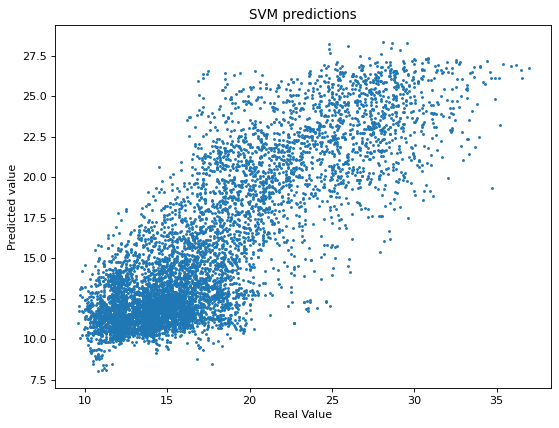

In [4]:
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X1scaled,y1,test_size=0.25,random_state=42) #split training:testing 75:25


estimator = svm.SVR(C = 100,  kernel = 'rbf', epsilon = 1).fit(inputXscaled, inputy)
y_pred = estimator.predict(testXscaled)

SVMMAPE = mean_absolute_percentage_error(testy, y_pred) * 100
print(SVMMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(testy,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('SVM predictions')
# Display a figure.
plt.show()

9.97874576043716


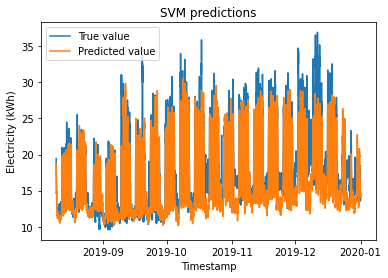

In [130]:
pred = estimator.predict(testXscaled)

SVMMAPE = mean_absolute_percentage_error(testy, pred) * 100
print(SVMMAPE)

plt.title('SVM predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
# show a legend on the plot
plt.xlabel('Timestamp')
plt.ylabel('Electricity (kWh)')
plt.legend()


# Multilayer perceptron

In [22]:
from sklearn.neural_network import MLPRegressor

layers = range(1,30)

parameters = {'hidden_layer_sizes': layers, 'solver': ['lbfgs', 'adam'], 'max_iter': [3000], 'learning_rate_init': 10.0 ** -np.arange(1, 6, 2), 'random_state':[42]}
MLPReg = GridSearchCV(MLPRegressor(), parameters, cv=5,  verbose=2, return_train_score=False)
MLPReg.fit(inputXscaled, inputy)

MLPRegRes = pd.DataFrame(MLPReg.cv_results_)
MLP_results = MLPRegRes[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_solver', 'param_max_iter', 'param_learning_rate_init']].sort_values(by=['rank_test_score'])
MLP_results

Fitting 5 folds for each of 174 candidates, totalling 870 fits
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.0s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.8s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.5s
[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam;

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.4s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.1s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.7s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.4s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.2s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=2, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.6s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.8s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   0.7s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   1.0s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   1.5s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=3, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.4s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   1.5s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.9s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.7s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   1.1s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=4, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   4.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  12.2s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.9s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   8.8s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.6s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=5, learning_rate

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  12.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   3.0s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   8.3s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  17.0s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  12.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  23.1s
[CV] END hidden_layer_sizes=

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  12.0s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.9s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   2.1s
[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   8.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.0s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   4.9s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   6.7s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   3.9s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   7.7s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.7s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.9s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=6, learning_rat

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.1s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   5.0s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   6.6s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   3.7s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=   7.8s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  13.5s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  11.1s
[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=   7.1s
[CV] END hidden_layer_sizes

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.1s
[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   5.6s
[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   6.9s
[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   3.8s
[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=   7.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   9.2s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   4.1s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.2s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   5.2s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   9.7s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.5s
[CV] END hidden_layer_sizes=7, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   4.0s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   7.4s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   8.9s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   4.2s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   9.1s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.9s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.1s
[CV] END hidden_layer_sizes=8, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.8min
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  11.2s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.4s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   6.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  19.8s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  10.8s
[CV] END hidden_layer_sizes=9, learning_r

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  17.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  15.4s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  15.7s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  16.1s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=   9.1s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.1s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  10.6s
[CV] END hidden_layer_sizes=9

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=   8.5s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  16.9s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  11.5s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.6s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  11.7s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=10, le

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.5s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.5s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  21.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  23.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  10.2s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.2s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.4s
[CV] END hidden_layer_sizes=11, lea

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  24.3s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  10.7s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.0s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  28.5s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  11.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  59.4s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  27.2s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.5s
[CV] END hidden_layer

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  24.2s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  10.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  31.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  16.6s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  24.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  25.1s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  26.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  26.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  24.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  25.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  19.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  11.7s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.5s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  25.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  26.1s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.1s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  23.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  26.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  18.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  27.3s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  22.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.7s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  11.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   0.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=13, lear

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  27.4s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  22.1s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  22.0s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  11.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.1s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  24.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  14.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  40.6s
[CV] END hidden_laye

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  27.8s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  22.7s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.9s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  13.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  17.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  31.4s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  19.2s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   5.5s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  21.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  16.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.5s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  11.9s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.6s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  12.2s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.1s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  12.3s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  18.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.9s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  16.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.5s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.2s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  27.5s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  31.0s
[CV] END hidden_layer_sizes=15, lea

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  31.0s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  27.0s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  16.3s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.1s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  16.7s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  15.7s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  15.6s
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.6s
[CV] END hidden_layer

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.8s
[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  28.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  21.9s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  31.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.8s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.8s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.5s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.2s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  20.9s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  30.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  35.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.1s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  16.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.1s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  12.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  21.5s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  32.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.5s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  32.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.8s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  17.2s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  24.4s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  58.6s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  33.2s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.6s
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  35.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  35.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min
[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.3s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  35.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.0s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.9s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.1s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.6s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  33.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  35.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.7s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.0s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.0s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  19.6s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  31.8s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  25.5s
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  29.2s
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  34.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  37.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  39.9s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  25.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.0s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  39.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.9s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  26.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.6s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  41.4s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  23.2s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  32.7s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  36.7s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  32.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  39.6s
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  25.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  38.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  40.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.0s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.5s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  40.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.8s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  39.5s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  30.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  47.2s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  46.6s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  36.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  40.8s
[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  39.7s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  36.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  43.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  41.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  43.7s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.7s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  40.7s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  37.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.9s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  25.6s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  30.6s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  33.5s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  43.0s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  24.8s
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  39.9s
[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  37.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  43.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  42.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.2s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.1s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.3s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.6s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.0s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  24.5s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.8s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.9s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.2s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.7s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.9s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.2s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.1s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  25.4s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  17.7s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  19.9s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  31.8s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  40.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.0s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  46.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.1s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  49.9s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  46.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  45.4s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.8s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  24.2s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.6s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  43.7s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  32.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.1s
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  44.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  46.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  46.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  49.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  49.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.7s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.4s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.9s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  35.5s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  29.1s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  38.3s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  30.6s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  49.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  46.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.9s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.6s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.6s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.5s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  49.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.1s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  48.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.8s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  26.2s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  27.8s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  29.6s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  34.4s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  21.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.8s
[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  47.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  57.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.0s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.3s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.0s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.3s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.4s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  47.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  51.6s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  56.0s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  20.8s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  37.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  50.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  51.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.6s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.0s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   1.5s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.1s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.4s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.9s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  34.8s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  28.0s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  47.8s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  35.0s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  22.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  52.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  56.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.7s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.4s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   4.7s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   3.6s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.3s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=3000, random_state=42, solver=adam; total time=   2.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  56.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.2s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  36.9s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  32.2s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  34.4s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  29.2s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=3000, random_state=42, solver=adam; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  53.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  54.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  56.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=lbfgs; total time=  55.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=3000, random_state=42, solver=adam; total time= 2.8min


,rank_test_score,mean_test_score,param_hidden_layer_sizes,param_solver,param_max_iter,param_learning_rate_init
111,1,0.763703,19,adam,3000,0.001
105,2,0.762524,18,adam,3000,0.001
117,3,0.758358,20,adam,3000,0.001
141,4,0.758220,24,adam,3000,0.001
87,5,0.757317,15,adam,3000,0.001
...,...,...,...,...,...,...
17,170,0.026730,3,adam,3000,0.00001
29,171,0.005575,5,adam,3000,0.00001
23,172,-0.013243,4,adam,3000,0.00001
5,173,-0.157679,1,adam,3000,0.00001


15.75648422880426


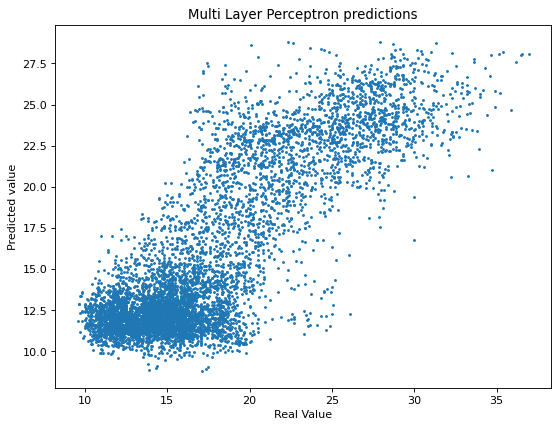

In [25]:
estimator = MLPRegressor(hidden_layer_sizes=19, solver = 'adam', max_iter=3000, learning_rate_init=0.001, random_state=42).fit(inputXscaled, inputy)
y_pred = estimator.predict(testXscaled)

MLPMAPE = mean_absolute_percentage_error(testy, y_pred) * 100
print(MLPMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(testy,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Multi Layer Perceptron predictions')
# Display a figure.
plt.show()

15.75648422880426


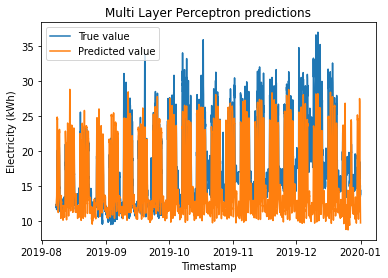

In [26]:
pred = estimator.predict(testXscaled)

MLPMAPE = mean_absolute_percentage_error(testy, pred) * 100
print(MLPMAPE)

plt.title('Multi Layer Perceptron predictions')
plt.plot(df['From Timestamp'].iloc[size:],testy, label = "True value")
plt.plot(df['From Timestamp'].iloc[size:],pred, label = "Predicted value")
# show a legend on the plot
plt.xlabel('Timestamp')
plt.ylabel('Electricity (kWh)')
plt.legend()

# Random Split

In [177]:
df = pd.read_excel("BaseFeaturesHH.xlsx")
df = df.drop('Unnamed: 0', axis = 1)

lagNumberStart = 1
lagNumberEnd = 8

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    df[name] = df['HH Electricity (kWh)'].shift(48*i)

i = list(range(lagNumberEnd*48))
df = df.drop(i)


feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    feature_cols.append(name)
    
X = df[feature_cols].copy() #input features for fitting
Y = df[['HH Electricity (kWh)']]


scaler = StandardScaler() #scaling
scaler.fit(X)
Xscaled = scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xscaled,Y,test_size=0.20,random_state=42) #split training:testing 80:20


<ipython-input-180-ed12b10fd0af>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator = RandomForestRegressor(n_estimators = 1000,  random_state=42).fit(X_train, y_train)


5.301960797789791


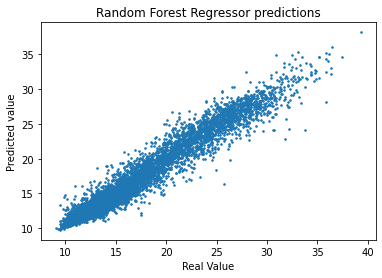

In [180]:
estimator = RandomForestRegressor(n_estimators = 1000,  random_state=42).fit(X_train, ravel(y_train))
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(RandomForestMAPE)

from matplotlib.figure import Figure as figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

7.654330433078378


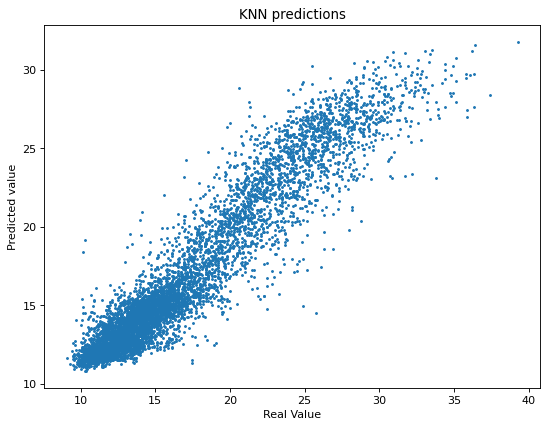

In [184]:
estimator = KNeighborsRegressor(n_neighbors = 104, weights = 'distance').fit(X_train, y_train)
y_pred = estimator.predict(X_test)

KNNMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(KNNMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('KNN predictions')
# Display a figure.
plt.show()

C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


7.325068194913794


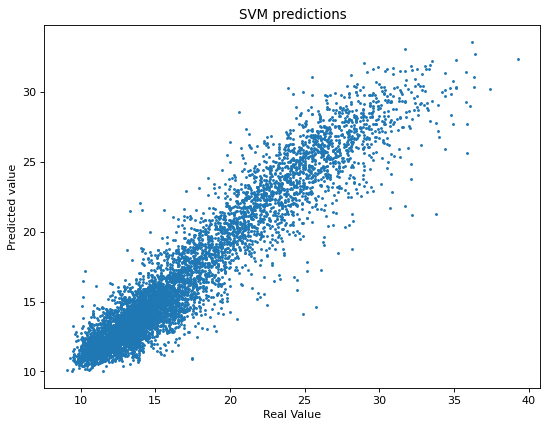

In [185]:
estimator = svm.SVR(C = 1,  kernel = 'rbf', epsilon = 0.1).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

SVMMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(SVMMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('SVM predictions')
# Display a figure.
plt.show()

In [188]:
from sklearn.neural_network import MLPRegressor

layers = range(1,30)

parameters = {'hidden_layer_sizes': layers, 'solver': ['lbfgs', 'adam'], 'max_iter': [2500], 'learning_rate_init': 10.0 ** -np.arange(1, 6, 2), 'random_state':[42]}
MLPReg = GridSearchCV(MLPRegressor(), parameters, cv=5,  verbose=2, return_train_score=False)
MLPReg.fit(X_train, y_train)

MLPRegRes = pd.DataFrame(MLPReg.cv_results_)
MLP_results = MLPRegRes[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_solver', 'param_max_iter', 'param_learning_rate_init']].sort_values(by=['rank_test_score'])
MLP_results

Fitting 5 folds for each of 174 candidates, totalling 870 fits


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   0.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=1, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=2, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min
[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  26.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   1.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=3, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min
[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  27.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=4, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.9min
[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=5, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   7.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=6, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   5.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   9.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   6.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   4.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   6.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=7, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.4min
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.9s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.1s
[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=8, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.0s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.6s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.4s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.8s
[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  10.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.5s
[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  18.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.5min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=9, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min
[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  10.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  16.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=10, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.7s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  16.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.8s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.9s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=   8.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  16.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.6s
[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.6s
[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=   9.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=11, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.2s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.5s
[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.6s
[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  15.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  20.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=12, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.1s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.7s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  24.7s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.6s
[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.6s
[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  21.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.6min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=13, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.7s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.8s
[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  12.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  13.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.5s
[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  11.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  14.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  19.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=14, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.4s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.8s
[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  28.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=15, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  27.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.6s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.4s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   0.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.4s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  23.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.7s
[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  11.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.9s
[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  22.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=16, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.2s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  26.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.4s
[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=   8.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  17.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  25.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.8min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=17, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 1.7min
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.5s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.0s
[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.3s
[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=18, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.9s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  34.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.7s
[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.2s
[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  28.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=19, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.1s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.0s
[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  25.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  33.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=20, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.2s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  35.5s
[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.0min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=21, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.9s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.7s
[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  24.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=22, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.0s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   5.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.0s
[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  36.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  38.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  37.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=23, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  29.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.0s
[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  32.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  24.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  30.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.3s
[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  31.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=24, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.9s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.8s
[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  13.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  17.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  39.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  40.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.1min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=25, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  41.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.4s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.0s
[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  12.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  14.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  42.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=26, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  50.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.9s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s
[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  15.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  24.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  20.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=27, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  46.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.3s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   1.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.7s
[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  16.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  18.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  19.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  25.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  43.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  45.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  44.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=28, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.2min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.8s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.8s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   4.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   3.2s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.1, max_iter=2500, random_state=42, solver=adam; total time=   2.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  49.0s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.3s
[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  23.7s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  28.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  21.3s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=0.001, max_iter=2500, random_state=42, solver=adam; total time=  22.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.1s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.5s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.9s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  48.6s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=lbfgs; total time=  47.4s


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV] END hidden_layer_sizes=29, learning_rate_init=1e-05, max_iter=2500, random_state=42, solver=adam; total time= 2.3min


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,rank_test_score,mean_test_score,param_hidden_layer_sizes,param_solver,param_max_iter,param_learning_rate_init
172,1,0.901754,29,lbfgs,2500,0.00001
170,1,0.901754,29,lbfgs,2500,0.001
168,1,0.901754,29,lbfgs,2500,0.1
124,4,0.899988,21,lbfgs,2500,0.00001
122,4,0.899988,21,lbfgs,2500,0.001
...,...,...,...,...,...,...
23,170,0.653448,4,adam,2500,0.00001
41,171,0.618623,7,adam,2500,0.00001
3,172,-0.000212,1,adam,2500,0.001
11,173,-2.319447,2,adam,2500,0.00001


C:\Users\salda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


8.597355117603344


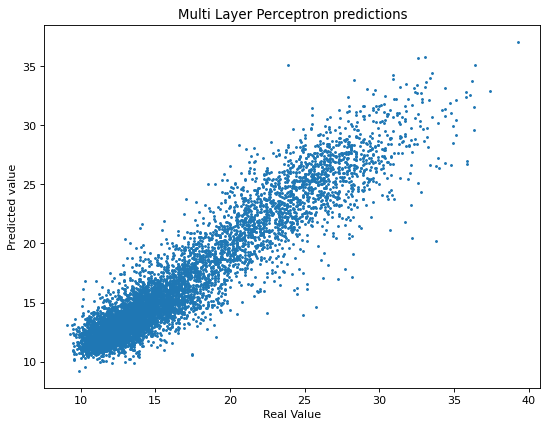

In [187]:
estimator = MLPRegressor(hidden_layer_sizes=5, solver = 'lbfgs', max_iter=3000, learning_rate_init=0.1, random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

MLPMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(MLPMAPE)

from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Multi Layer Perceptron predictions')
# Display a figure.
plt.show()